<a href="https://colab.research.google.com/github/vmprakash-swaminathan/NAN-MUDHALVAN-ORACLE/blob/main/Bayesian_Optimization_for_Logistic_Regression_for_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bayesian Optimization for Logistic Regression for Customer Churn Prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
import joblib
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load and Preprocess the Data

In [ ]:
data_path = './enhanced_feature_data.csv'
df = pd.read_csv(data_path)
df.drop(['tenure_bins'], axis=1, inplace=True)
feature_columns = [col for col in df.columns if col != 'Churn']
X = df[feature_columns]
y = df['Churn']

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Bayesian Optimization Hyperparameter Tuning

In [ ]:
search_spaces = {
    'penalty': Categorical(['l1', 'l2']),
    'C': Real(0.01, 100, prior='log-uniform'),
    'solver': Categorical(['liblinear', 'saga']),
    'max_iter': Integer(100, 300)
}

search_spaces_elasticnet = {
    'penalty': Categorical(['elasticnet']),
    'C': Real(0.01, 100, prior='log-uniform'),
    'solver': Categorical(['saga']),
    'max_iter': Integer(100, 300),
    'l1_ratio': Real(0, 1, prior='uniform')
}
combined_search_spaces = [
    search_spaces,
    search_spaces_elasticnet
]

bayes_search = BayesSearchCV(
    estimator=LogisticRegression(random_state=42),
    search_spaces=combined_search_spaces,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

bayes_search.fit(X_train, y_train)
best_params = bayes_search.best_params_
print(f'Best parameters found by Bayesian Optimization: {best_params}')
best_log_reg_model = LogisticRegression(**best_params, random_state=42)
best_log_reg_model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

LogisticRegression(C=0.33290807537187833, l1_ratio=1.0, max_iter=300,
                   penalty='elasticnet', random_state=42, solver='saga')

Evaluate the Model

Accuracy: 0.82
Precision: 0.69
Recall: 0.58
F1-Score: 0.63
ROC AUC: 0.74


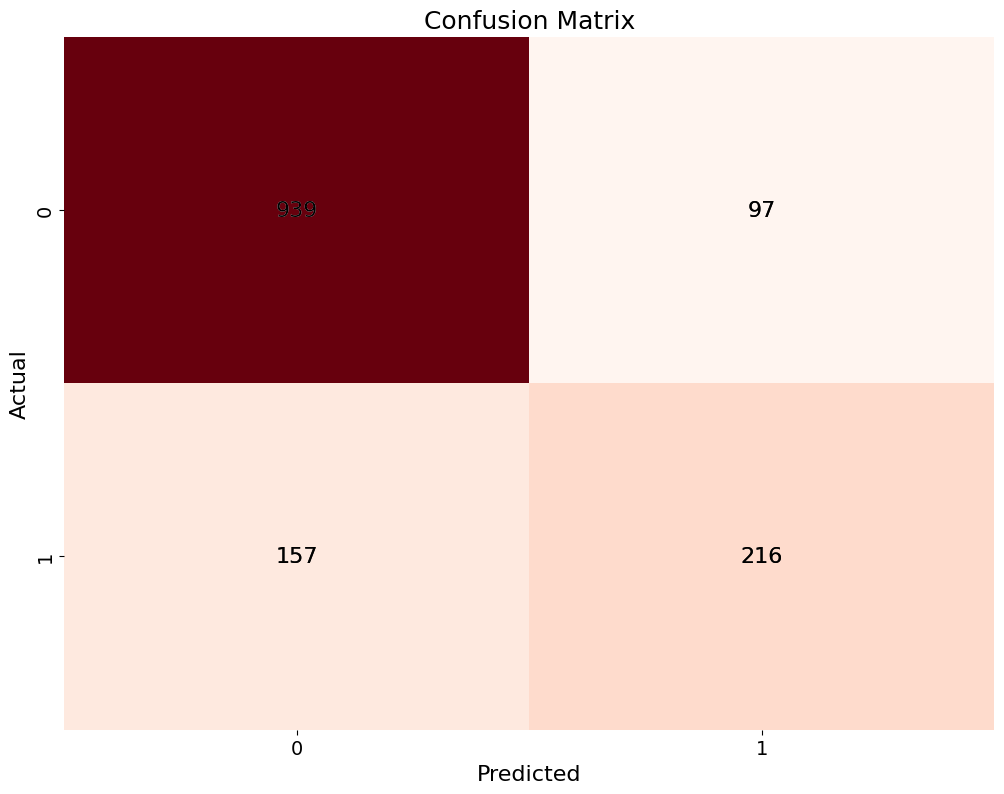

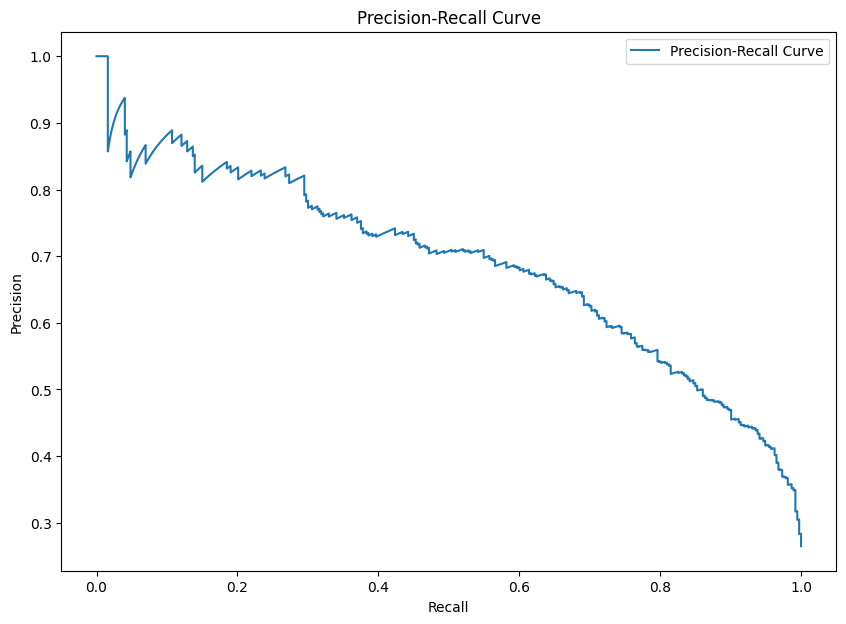

In [ ]:
y_pred = best_log_reg_model.predict(X_test)
y_pred_proba = best_log_reg_model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center", color="black", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

Save Results

In [ ]:
with open('./LogisticRegression_EvaluationMetrics.txt', 'w') as f:
    f.write(f'Accuracy: {accuracy:.2f}\n')
    f.write(f'Precision: {precision:.2f}\n')
    f.write(f'Recall: {recall:.2f}\n')
    f.write(f'F1-Score: {f1:.2f}\n')
    f.write(f'ROC AUC: {roc_auc:.2f}\n')

class_report = classification_report(y_test, y_pred)
with open('./LogisticRegression_ClassificationReport.txt', 'w') as f:
    f.write(class_report)

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center", color="black", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('./LogisticRegression_ConfusionMatrix.png')
plt.close()

Save the Model

In [ ]:
model_filename = 'best_churn_model_log_reg.joblib'
joblib.dump(best_log_reg_model, model_filename)
print(f'Model saved to {model_filename}')

Model saved to best_churn_model_log_reg.joblib
